# Otsu's Method for Segmentation

The main idea is to minimize the intra-class variance, so we use a threshold to separate the data in two sets (classes) such that:

$$\text{P}\left( \text{Class 1}\right) \cdot \text{Variance of Class 1}+\text{P}\left( \text{Class 2}\right) \cdot \text{Variance of Class 2}$$

is minimal.

https://en.wikipedia.org/wiki/Otsu%27s_method

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd


# import seaborn: very important to easily plot histograms and density estimations
import seaborn as sns

from scipy import stats
from scipy.stats import norm

In [ ]:
# we create two fictitious populations (i.e. squirrels and rabbits)
data = np.concatenate((norm.rvs(size=500,loc=1.5,scale=0.3),norm.rvs(size=500,loc=5,scale=1.25)),axis=0)
#group = np.repeat([0,1],500)

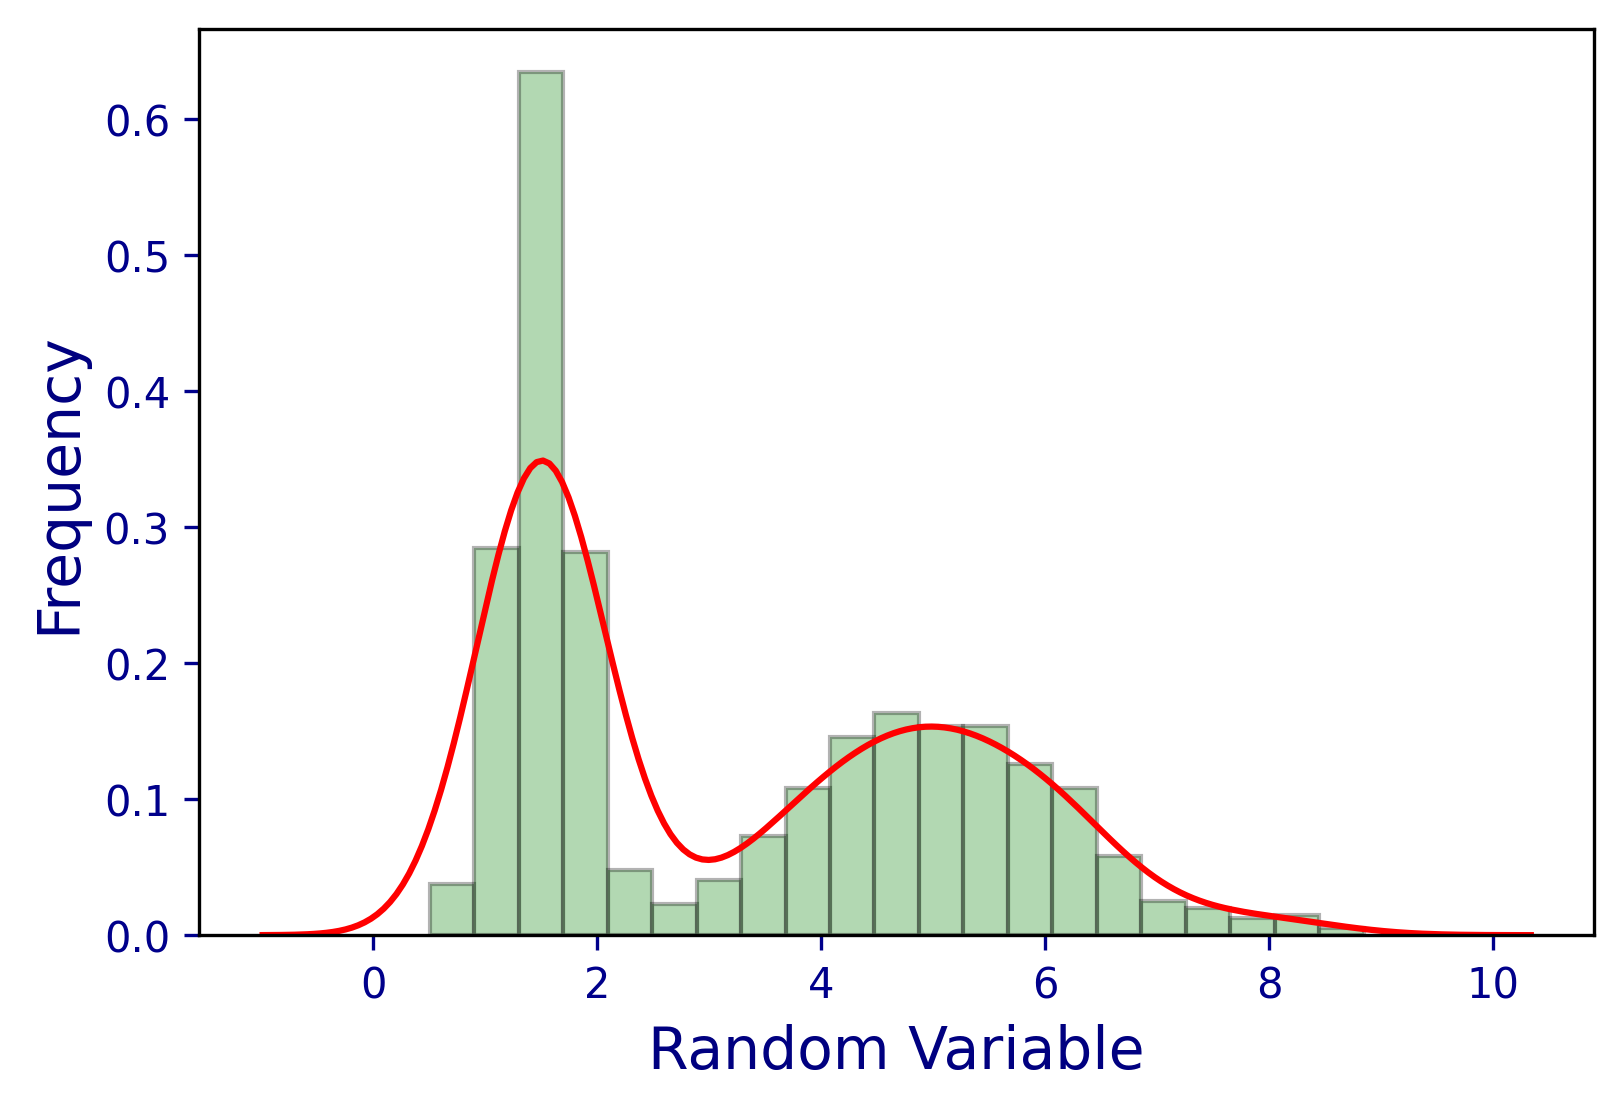

In [ ]:
plt.figure()
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data,
                  bins=21,
                  kde=True,
                  color='red',
                  hist_kws={'color':'green','alpha':0.3,'edgecolor':'black'},
                  #fit=stats.norm,
                  #fit_kws={"color":'deepskyblue'}
                   )
ax1.set_xlabel('Random Variable',fontsize=14,color='navy')
ax1.set_ylabel('Frequency',fontsize=14,color='navy')
l1 = ax1.lines[0]
#plt.axvline(x=3.0, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
#ax1.fill_between(x,y, where = x <= 3.0, color='palegreen',alpha=0.5)

In [ ]:
np.var(data)

4.032363551803928

In [ ]:
# we generate equally spaced percentages (by 0.1)
t = np.linspace(0.1,99.9,num=999)

In [ ]:
t = np.arange(0.1,100,0.1)

In [ ]:
t

In [ ]:
# here we applied Otsu's method
# the variable cost keeps track of all values of the objective
cost = []
for i in t:
  dat1 = data[data<np.percentile(data,i)]
  dat2 = data[data>=np.percentile(data,i)]
  cost.append(i*np.var(dat1)+(100-i)*np.var(dat2))

In [ ]:
cost

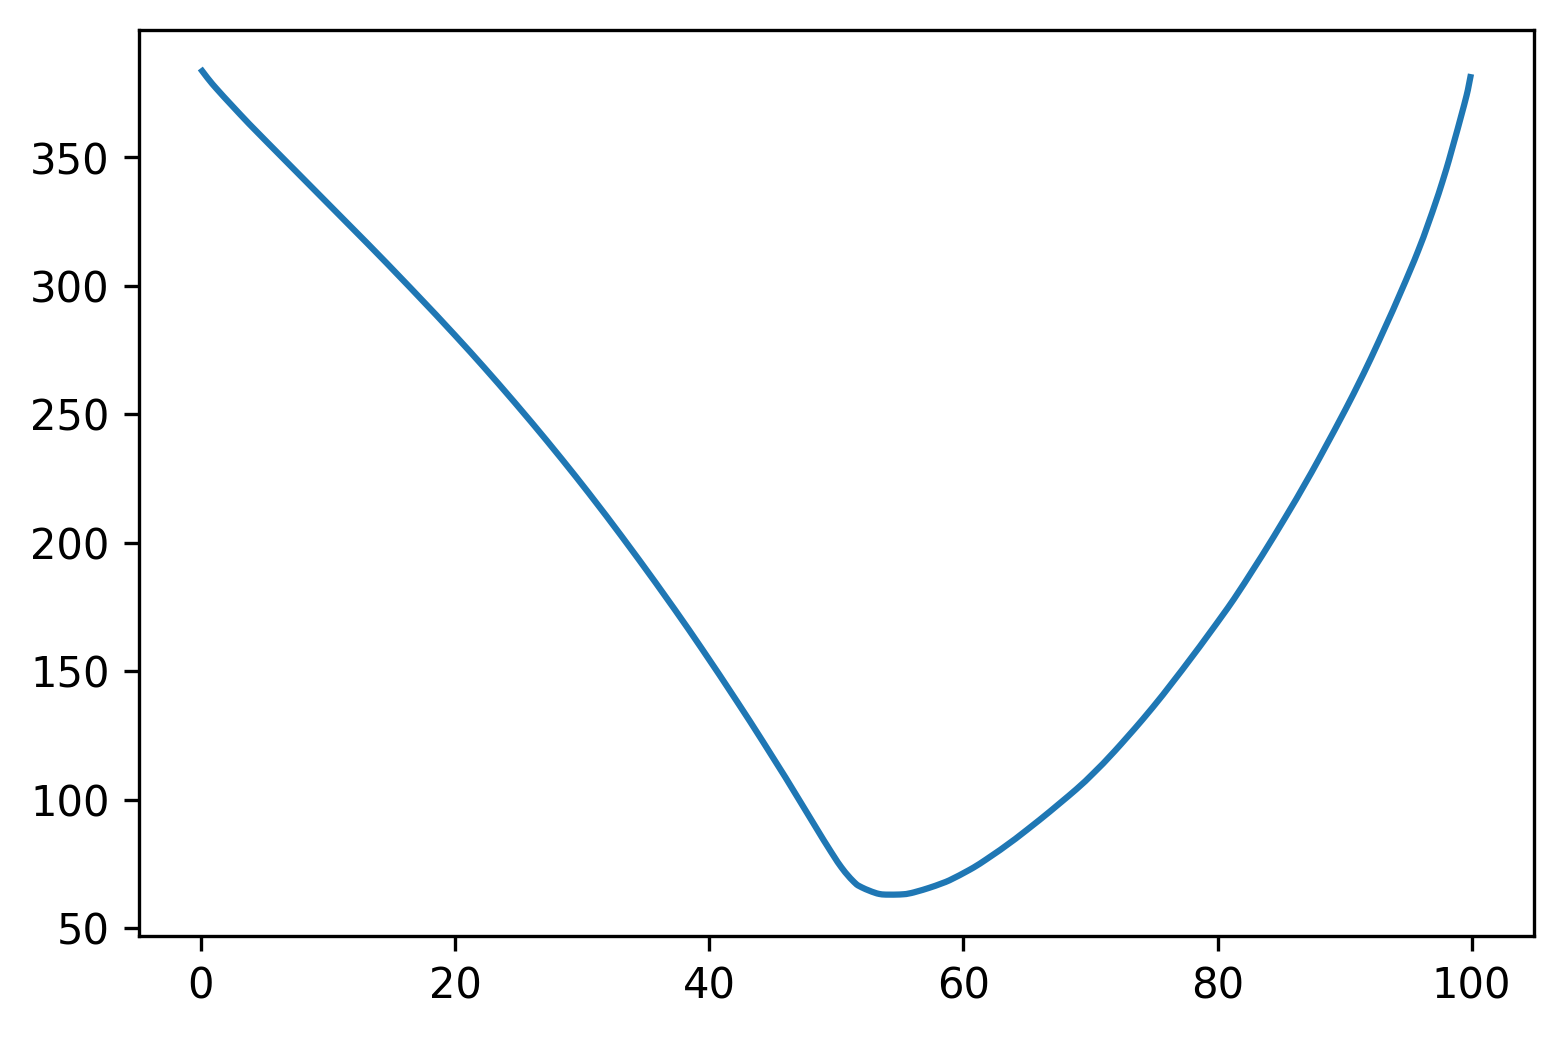

In [ ]:
plt.plot(t,cost)
plt.show()

In [ ]:
# the thresholding value is
v = np.percentile(data,t[np.argmin(cost)])
print('The thresholding value is : '+str(v))

The thresholding value is : 3.4083121603139763


In [ ]:
t[np.argmin(cost)]

54.6

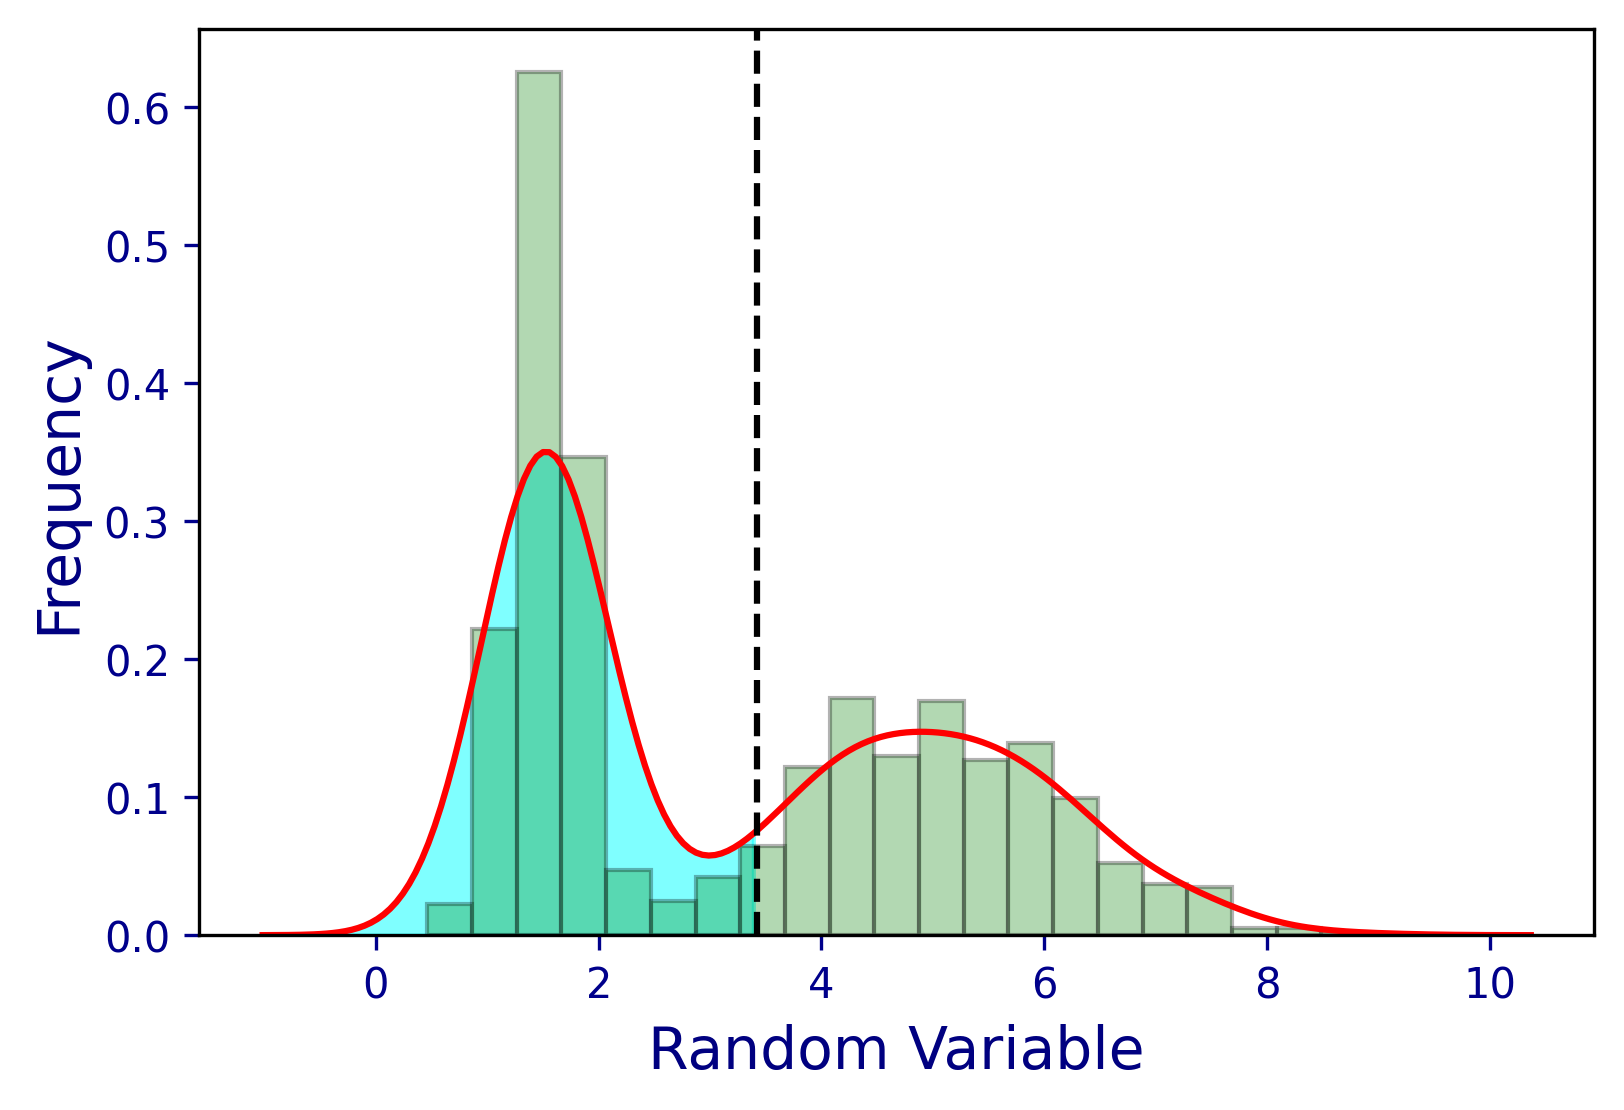

In [ ]:
# we show the cut according to Otsu's method
plt.figure()
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data,
                  bins=21,
                  kde=True,
                  color='red',
                  hist_kws={'color':'green','alpha':0.3,'edgecolor':'black'},
                  #fit=stats.norm,
                  #fit_kws={"color":'deepskyblue'}
                   )
ax1.set_xlabel('Random Variable',fontsize=14,color='navy')
ax1.set_ylabel('Frequency',fontsize=14,color='navy')
l1 = ax1.lines[0]
plt.axvline(x=v, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
ax1.fill_between(x,y, where = x <= v, color='cyan',alpha=0.5)
plt.show()

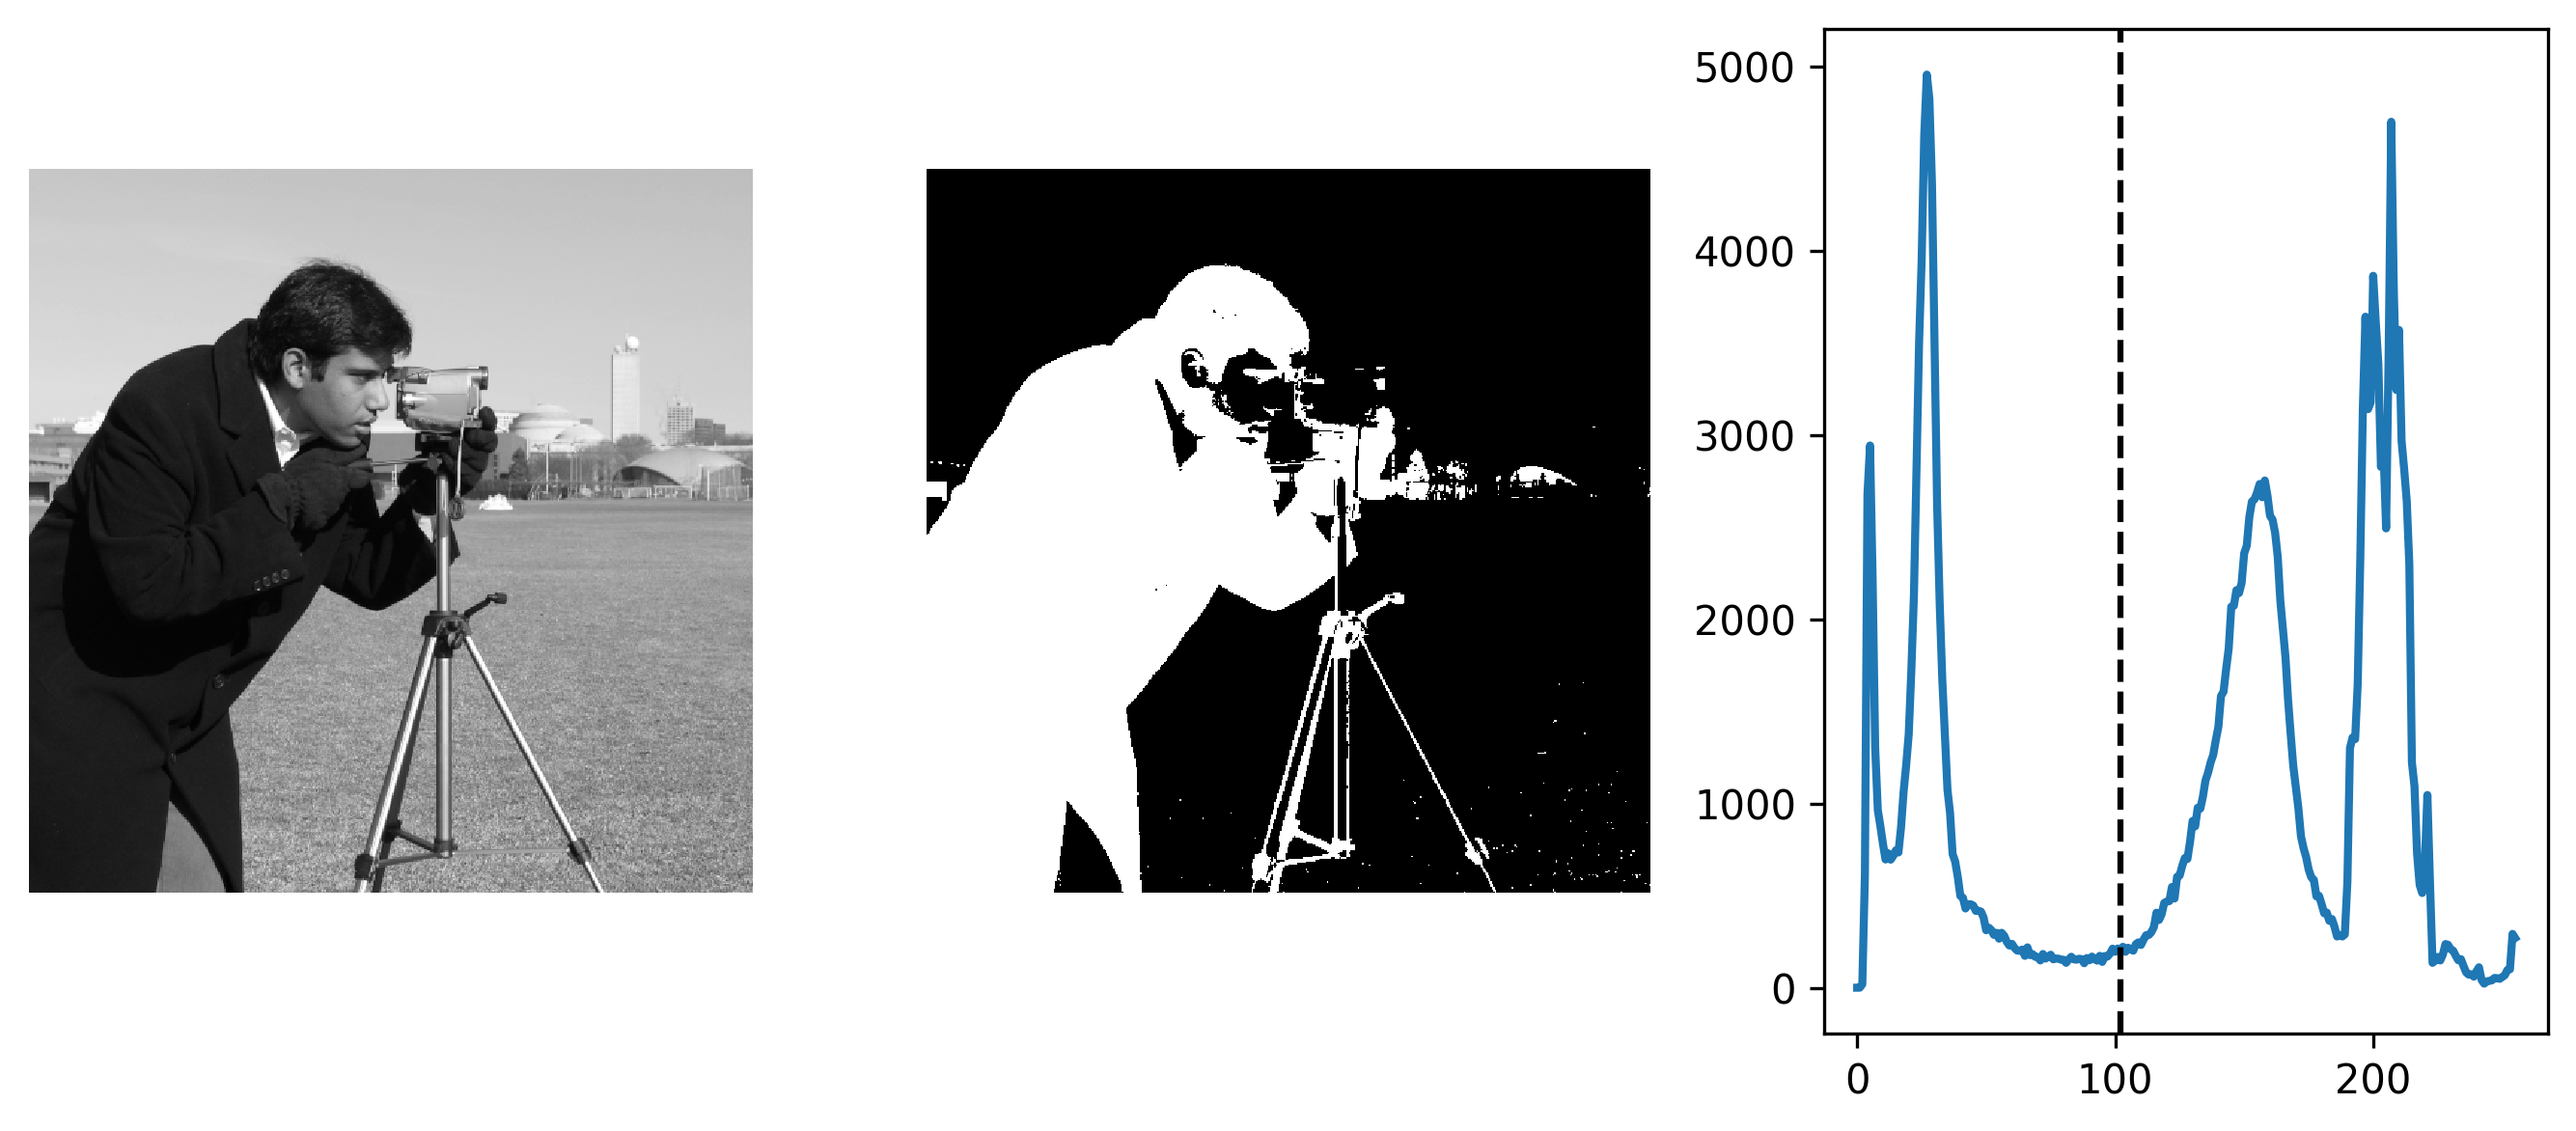

In [ ]:
from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)

hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

In [ ]:
from skimage import io
from skimage.color import rgb2gray

In [ ]:
image = io.imread(fname='drive/MyDrive/Data Sets/example.jpeg')

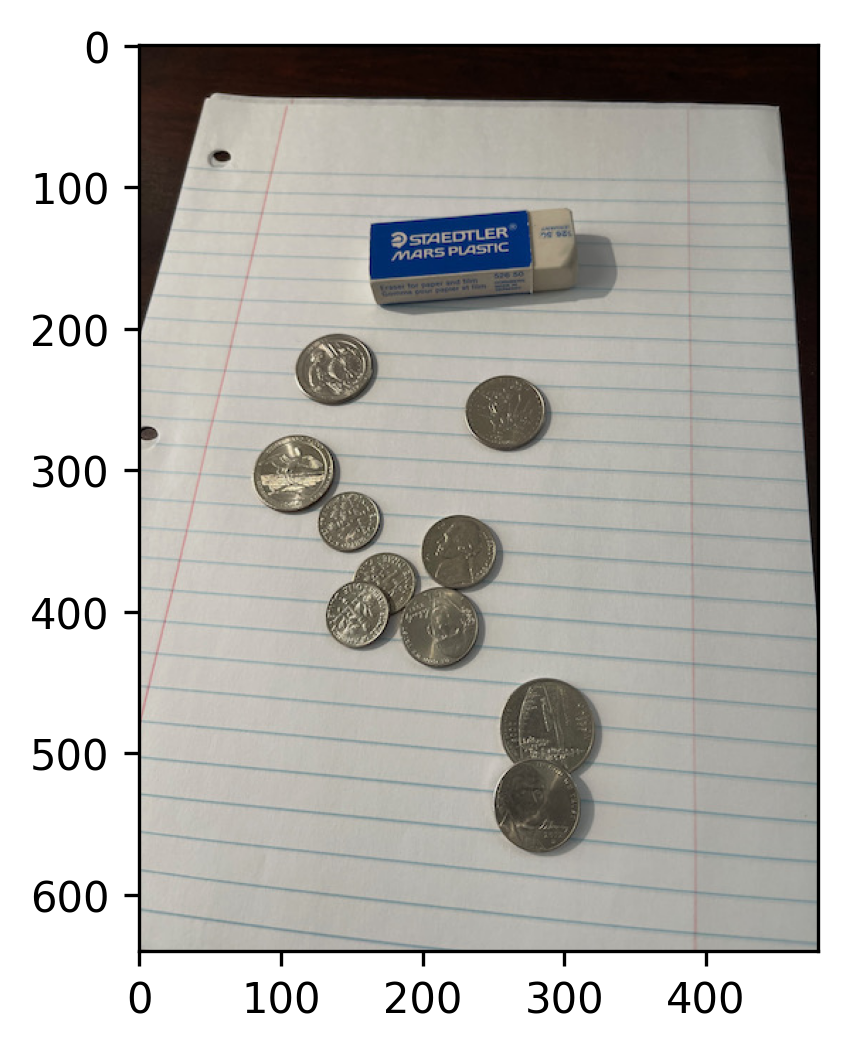

In [ ]:
plt.imshow(image)

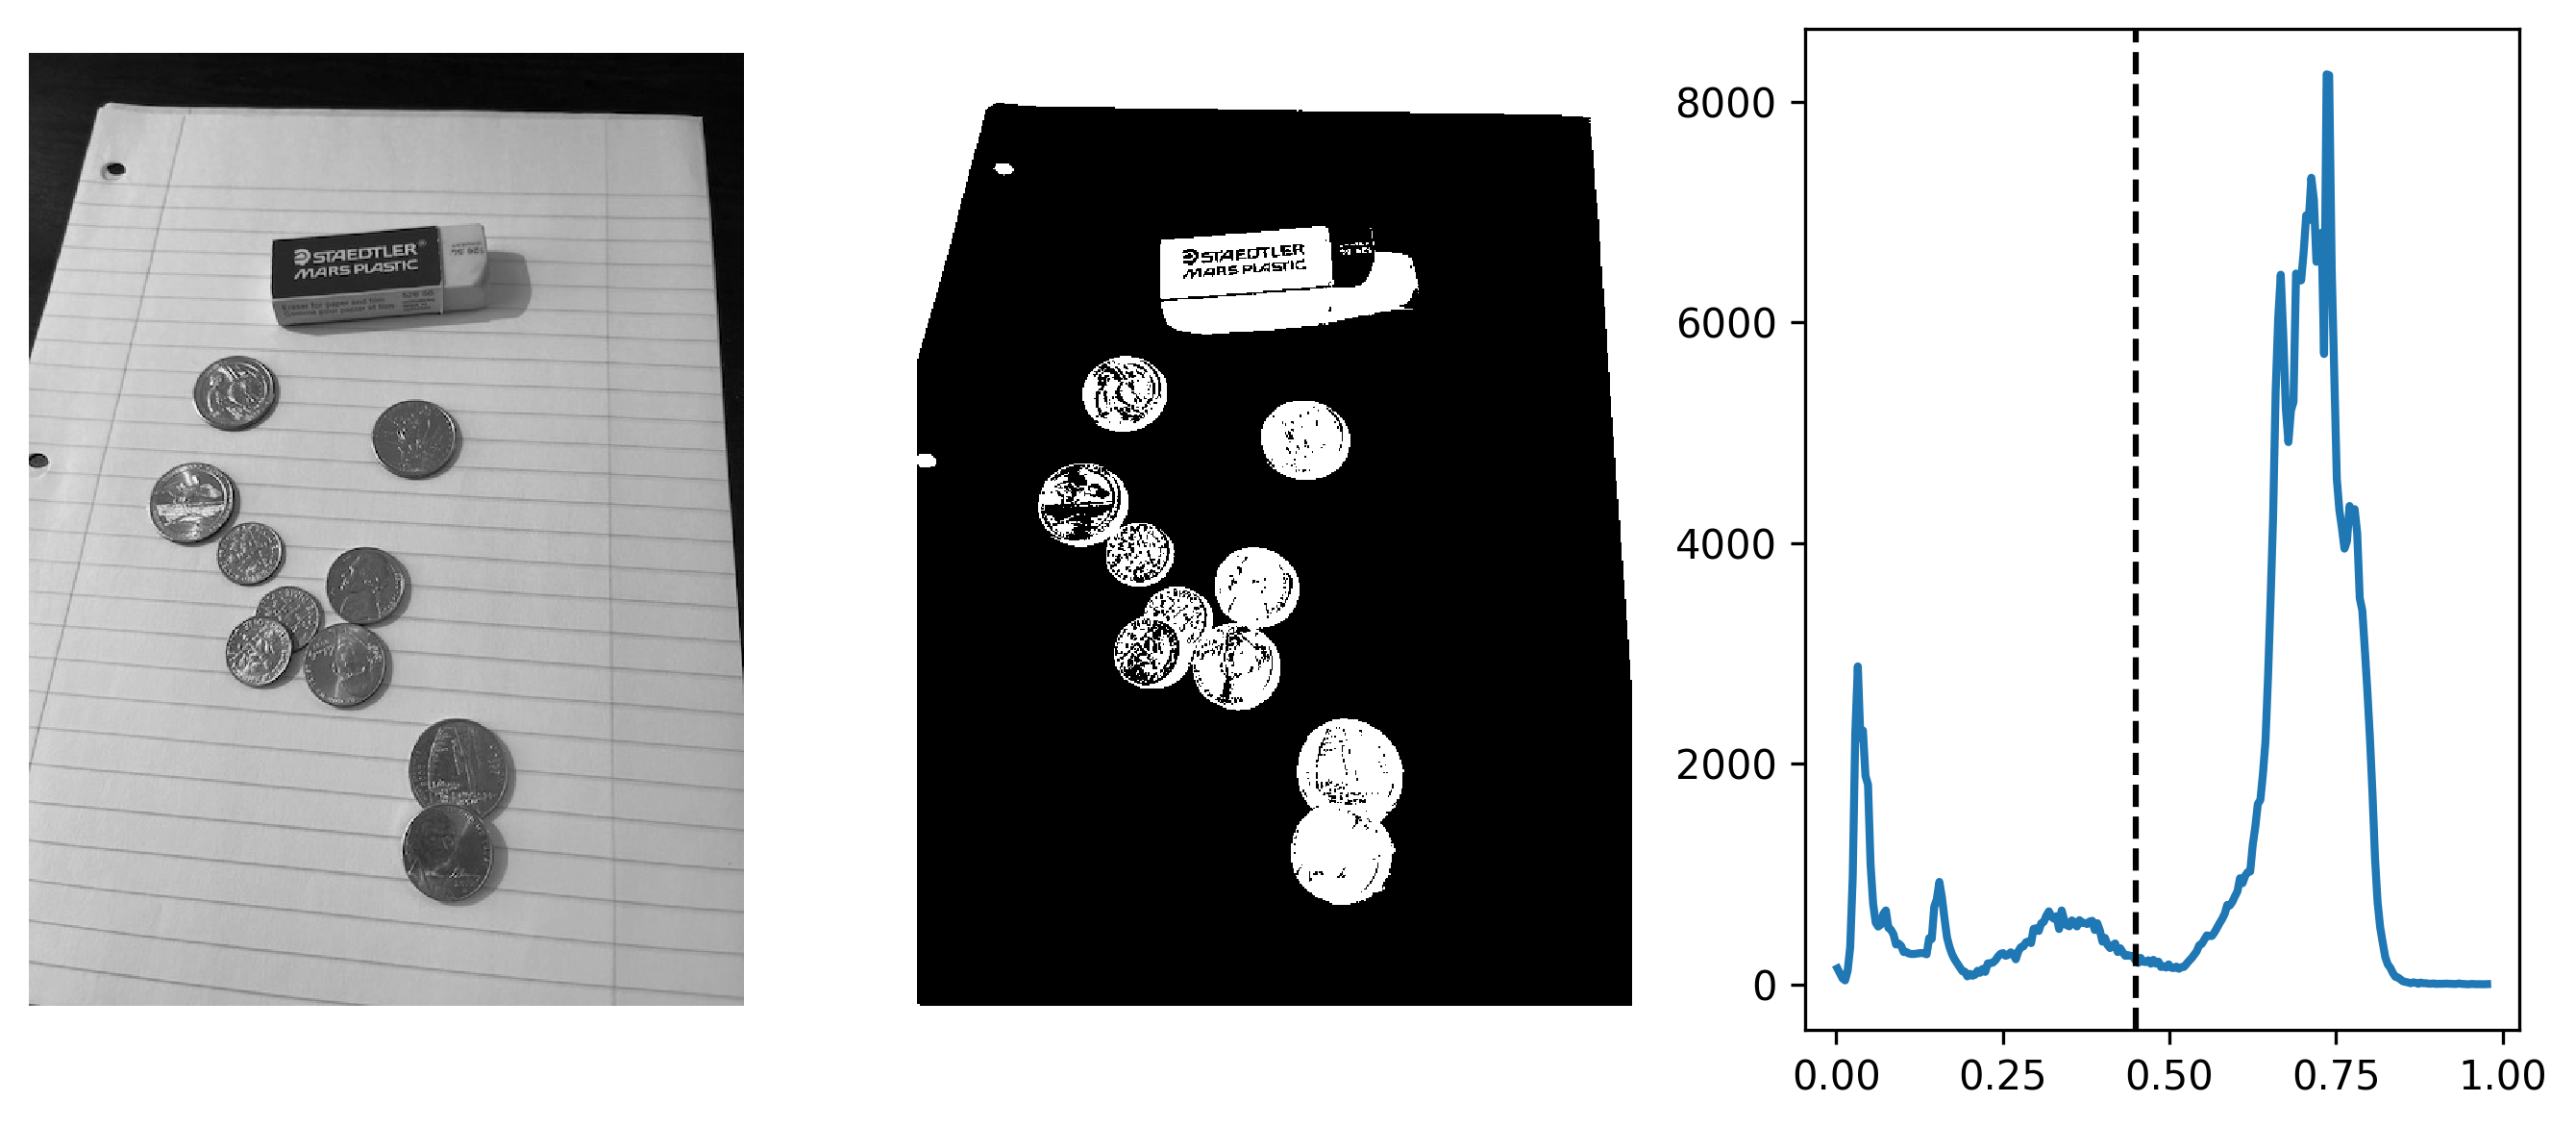

In [ ]:
image = io.imread(fname='drive/MyDrive/Data Sets/example.jpeg')

image = rgb2gray(image)

val = filters.threshold_otsu(image)

hist, bins_center = exposure.histogram(image)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(image < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()